#0 Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

import zipfile
import os
import glob
import re
from datetime import timedelta

# from google.colab import drive
# drive.mount('/content/drive',force_remount=True)

In [5]:
abspath = os.path.abspath(os.pardir)

datafolder = 'data/'

datapath = os.path.join(abspath, datafolder)

figurefolder = 'figures/'

figurepath = os.path.join(abspath, figurefolder)

# datapath = '/3036336718_3036339721/data'
# figurepath = '/3036336718_3036339721/figures'
# datapath = '/content/drive/MyDrive/DataC200 Graduate Project/Dataset/'
# figurepath = '/content/drive/MyDrive/DataC200 Graduate Project/Figures/'
covid19_daily_report_folder = 'csse_covid_19_daily_reports_us'

files = os.path.join(datapath, covid19_daily_report_folder, '*.csv')

sex_age_path = os.path.join(abspath, datafolder, 'cdc_death_counts_by_sex_age_state.csv')

# list of merged files returned
files = glob.glob(files)

daily_report = pd.DataFrame()
# rename
for i in files:
  df = pd.read_csv(i, index_col=0)
  df['Last_Update'] = pd.to_datetime(df['Last_Update'])
  df['date'] = df['Last_Update'].dt.date-timedelta(days=1)

  daily_report = pd.concat([daily_report, df], axis=0)
daily_report.reset_index(inplace=True)
sex_age = pd.read_csv(sex_age_path)
daily_report['date'] = pd.to_datetime(daily_report['date'])

#1 Time Series EDA  
**Drops of Case-Fatality Ratio Near Christmas**  
When plotting the nationwide time-series values of Case-Fatality Ratio, a sharp drop is visible from late November to early January in both 2020-2021 and 2021-2022, while the Case-Fatality Ratio during the middle of a year is relatively stable. If we look at the same plots of California, this trend is even more apparent. This could be caused by a great increase of infected cases in a short period when people are more likely to be exposed to the virus during long national holidays. The time-series plot of Incident Rate supports this hypothesis. A sharp rise of Incident Rate is visible at the same time periods as in the Case-Fatality Ratio plot.


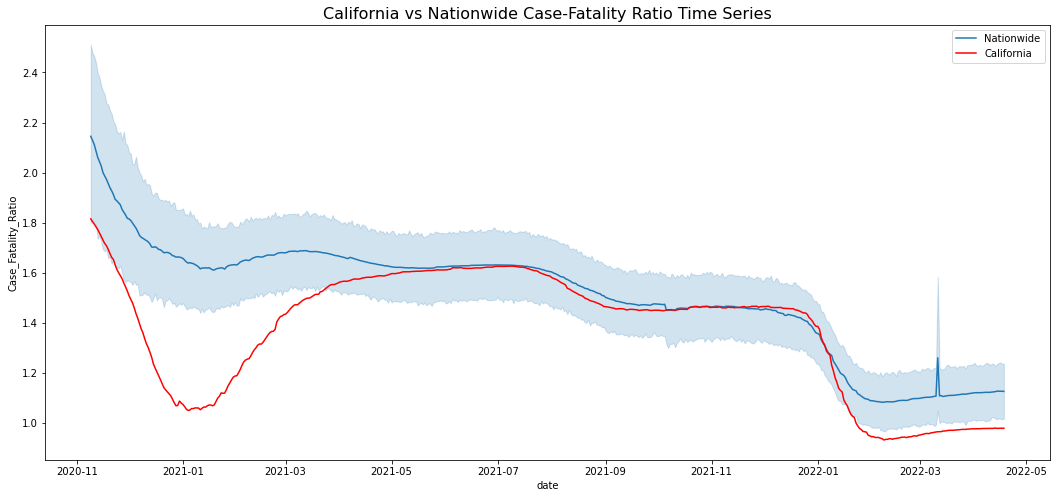

In [6]:
plt.figure(figsize=(18,8))
sns.lineplot(data=daily_report,x='date',y='Case_Fatality_Ratio',label='Nationwide')
sns.lineplot(data=daily_report[daily_report['Province_State']=='California'],x='date',y='Case_Fatality_Ratio',label='California',color='r')
plt.title('California vs Nationwide Case-Fatality Ratio Time Series',fontsize=16)

plt.savefig(figurepath+'California_vs_Nationwide_CFR_Time_Series.png')

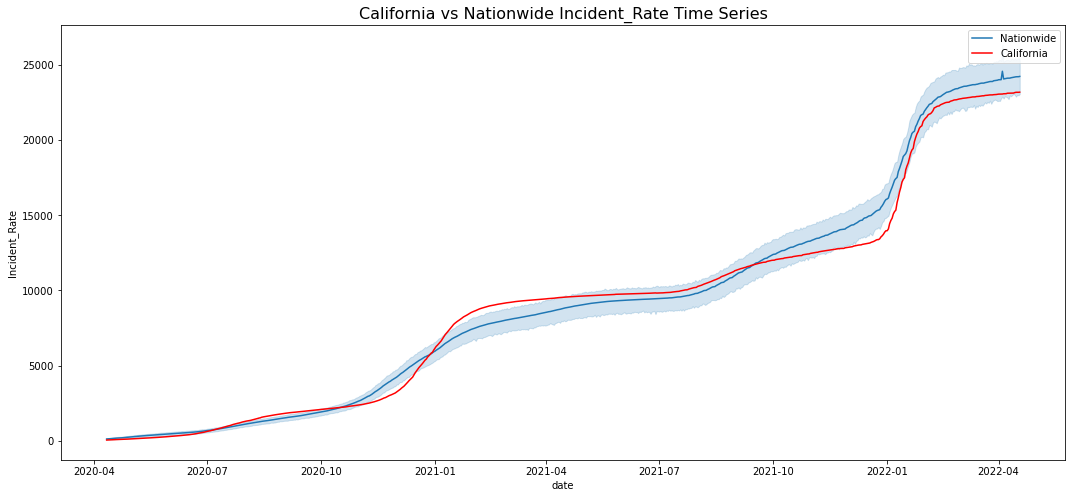

In [7]:
plt.figure(figsize=(18,8))
sns.lineplot(data=daily_report,x='date',y='Incident_Rate',label='Nationwide')
sns.lineplot(data=daily_report[daily_report['Province_State']=='California'],x='date',y='Incident_Rate',label='California',color='r')
plt.title('California vs Nationwide Incident_Rate Time Series',fontsize=16)

plt.savefig(figurepath+'California_vs_Nationwide_Incident_Rate_Time_Series.png')

#2 Statewide EDA

**Indicates of Healthcare Resources Shortage**  
The scatter figure below shows the relationship between Incident Rate mean and Case-Fatality Ratio mean in different states from 2021 to 2022. States near the right-bottom have high Incident Rates, but low Case-Fatality Ratio, such as Utah and Alaska. These states are more likely to have sufficient healthcare resources. On the contrary, states near the left-top have low Incident Rates, but high Case-Fatality Ratio, such as District of Columbia and Maryland. These states are more likely to suffer from a shortage of healthcare resources.


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


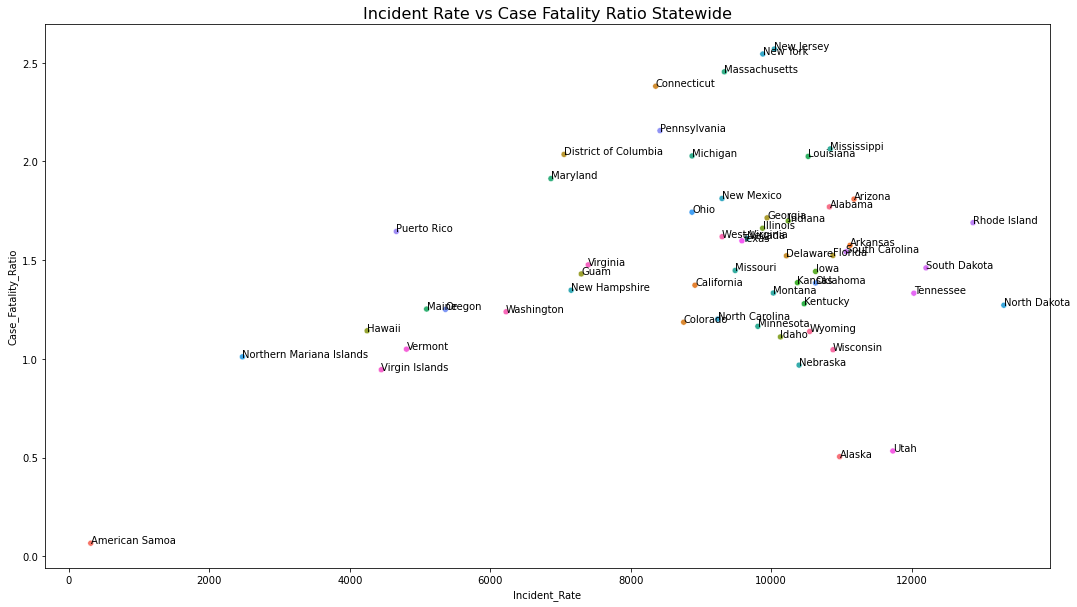

In [8]:
incident_fatality = daily_report.groupby('Province_State').mean()[['Incident_Rate','Case_Fatality_Ratio']].reset_index()
plt.figure(figsize=(18,10))
sns.scatterplot(data=incident_fatality,x='Incident_Rate',y='Case_Fatality_Ratio',hue='Province_State')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.5, point['y'], str(point['val']))

label_point(incident_fatality.Incident_Rate, incident_fatality.Case_Fatality_Ratio, incident_fatality.Province_State, plt.gca())
plt.title('Incident Rate vs Case Fatality Ratio Statewide',fontsize=16)
plt.legend().set_visible(False)

plt.savefig(figurepath+'Incident_Rate_vs_Case_Fatality_Ratio_Statewide.png')

**Virus becoming more infective but less deadly from 2021 to 2022**  
The scatter figure below shows the comparison of 2021 and 2022 on Incident Rates and Case-Fatality Ratios over all the states. In general the scatters of 2022 lie on the right side of the plot, indicating the virus is more likely to infect people in 2022 than in 2021. However, the scatters of 2022 also lie on the bottom of the plot, indicating the virus is less deadly in 2022 than in 2021.  


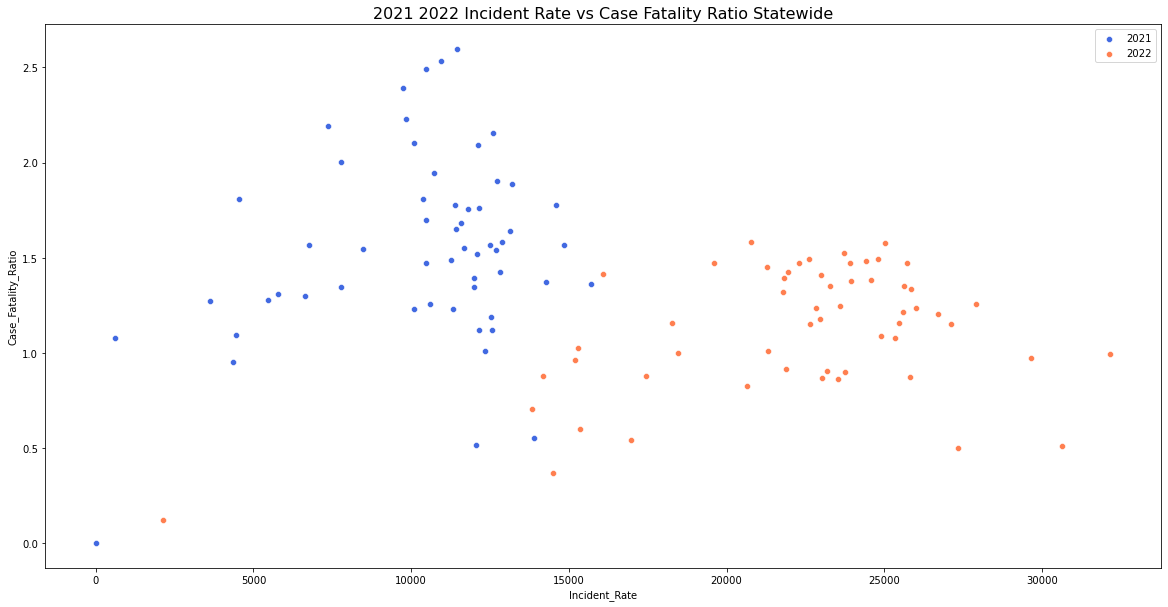

In [9]:
daily_report['date']=pd.to_datetime(daily_report['date'])
incident_fatality_2021 = daily_report[(daily_report['date']>'2020-12-31')&(daily_report['date']<'2022-01-01')].groupby('Province_State').mean()[['Incident_Rate','Case_Fatality_Ratio']].reset_index()
incident_fatality_2022 = daily_report[(daily_report['date']>'2021-12-31')&(daily_report['date']<'2023-01-01')].groupby('Province_State').mean()[['Incident_Rate','Case_Fatality_Ratio']].reset_index()

plt.figure(figsize=(20,10))
sns.scatterplot(data=incident_fatality_2021,x='Incident_Rate',y='Case_Fatality_Ratio',color='royalblue',label='2021')
sns.scatterplot(data=incident_fatality_2022,x='Incident_Rate',y='Case_Fatality_Ratio',color='coral',label='2022')

plt.title('2021 2022 Incident Rate vs Case Fatality Ratio Statewide',fontsize=16)
plt.legend()

plt.savefig(figurepath+'2021_2022_Incident_Rate_vs CFR_Statewide.png')

#3 Sex-Age EDA  
**Proportion of deaths caused by COVID-19 increasing as age grows**  
The bar plot below shows how the proportion of deaths caused by COVID-19 over total deaths differ according to different age groups and sexes. As age grows, the proportion caused by COVID-19 increases. Although in general, this proportion of both sexes are very close over all age groups, the difference of that in a young generation (18-29) is quite larger.


/var/folders/1f/tjw7c28d6413x6mczf5qlvs80000gn/T/ipykernel_46520/2673456724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_age_us['covid_deaths_over_total_deaths'] = sex_age_us['COVID-19 Deaths']/sex_age_us['Total Deaths']


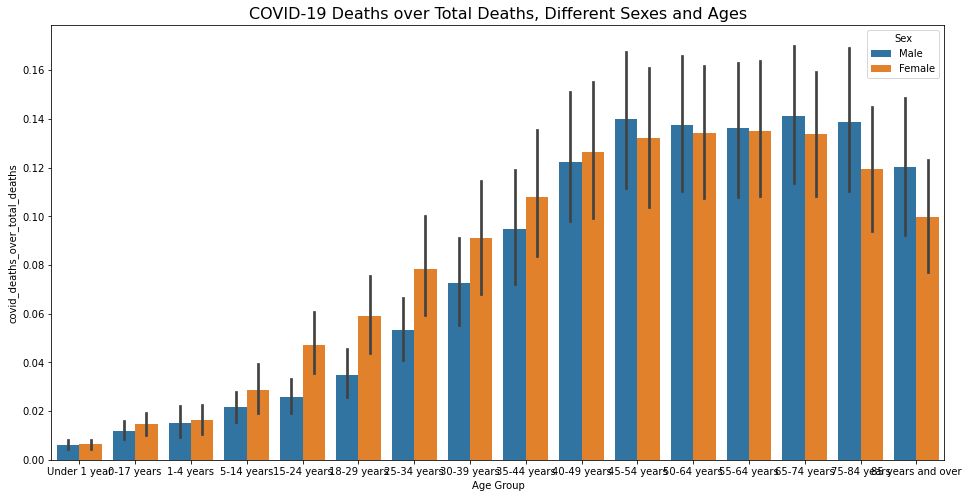

In [10]:
sex_age_us = sex_age[(sex_age['State']=='United States')&(sex_age['Age Group']!='All Ages')&(sex_age['Sex']!='All Sexes')]
sex_age_us['covid_deaths_over_total_deaths'] = sex_age_us['COVID-19 Deaths']/sex_age_us['Total Deaths']

plt.figure(figsize=(16,8))
sns.barplot(data=sex_age_us,x='Age Group',y='covid_deaths_over_total_deaths',hue='Sex')
plt.title('COVID-19 Deaths over Total Deaths, Different Sexes and Ages',fontsize=16)

plt.savefig(figurepath+'Sex_Age_Deaths_Proportion.png')
